## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  46.115732   941.563153  0.404257  2.944126  1.358392
1  34.282444  1554.805570  0.344757  5.228862  1.568505
2  22.160801   495.511302  0.798247  8.078106  1.460752
3  62.387741   196.907290  0.108552  9.213361  0.289473
4  13.503549   224.725505  0.089727  5.854418  0.945733


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.0909  | train_mse: 9.47989 | train_mae: 1.86649 |  0:00:00s
epoch 1  | loss: 0.85388 | train_mse: 2.59478 | train_mae: 1.18715 |  0:00:00s
epoch 2  | loss: 0.65755 | train_mse: 1.84829 | train_mae: 1.02525 |  0:00:00s


epoch 3  | loss: 0.68916 | train_mse: 1.42969 | train_mae: 0.87278 |  0:00:00s
epoch 4  | loss: 0.63457 | train_mse: 2.09199 | train_mae: 0.95484 |  0:00:00s
epoch 5  | loss: 0.47176 | train_mse: 1.47384 | train_mae: 0.83654 |  0:00:00s


epoch 6  | loss: 0.49181 | train_mse: 0.82598 | train_mae: 0.61107 |  0:00:00s
epoch 7  | loss: 0.53239 | train_mse: 0.90151 | train_mae: 0.61105 |  0:00:00s
epoch 8  | loss: 0.56355 | train_mse: 1.29143 | train_mae: 0.74051 |  0:00:00s


epoch 9  | loss: 0.60307 | train_mse: 1.2505  | train_mae: 0.76915 |  0:00:00s
epoch 10 | loss: 0.39017 | train_mse: 0.90391 | train_mae: 0.71135 |  0:00:00s
epoch 11 | loss: 0.2355  | train_mse: 0.58202 | train_mae: 0.60998 |  0:00:00s
epoch 12 | loss: 0.23105 | train_mse: 0.46984 | train_mae: 0.50778 |  0:00:01s


epoch 13 | loss: 0.28126 | train_mse: 0.40124 | train_mae: 0.46525 |  0:00:01s
epoch 14 | loss: 0.2433  | train_mse: 0.47492 | train_mae: 0.50301 |  0:00:01s
epoch 15 | loss: 0.24578 | train_mse: 0.52912 | train_mae: 0.54513 |  0:00:01s


epoch 16 | loss: 0.22446 | train_mse: 0.4777  | train_mae: 0.52252 |  0:00:01s
epoch 17 | loss: 0.29063 | train_mse: 0.3331  | train_mae: 0.41996 |  0:00:01s
epoch 18 | loss: 0.20739 | train_mse: 0.30665 | train_mae: 0.41518 |  0:00:01s


epoch 19 | loss: 0.14738 | train_mse: 0.27893 | train_mae: 0.40434 |  0:00:01s
epoch 20 | loss: 0.24607 | train_mse: 0.25931 | train_mae: 0.37864 |  0:00:01s
epoch 21 | loss: 0.24883 | train_mse: 0.34593 | train_mae: 0.44052 |  0:00:01s


epoch 22 | loss: 0.21038 | train_mse: 0.46348 | train_mae: 0.492   |  0:00:01s
epoch 23 | loss: 0.28286 | train_mse: 0.36927 | train_mae: 0.4555  |  0:00:01s
epoch 24 | loss: 0.30014 | train_mse: 0.38612 | train_mae: 0.47086 |  0:00:02s


epoch 25 | loss: 0.20768 | train_mse: 0.36733 | train_mae: 0.44834 |  0:00:02s
epoch 26 | loss: 0.25601 | train_mse: 0.31773 | train_mae: 0.41035 |  0:00:02s
epoch 27 | loss: 0.13443 | train_mse: 0.19878 | train_mae: 0.31801 |  0:00:02s


epoch 28 | loss: 0.21481 | train_mse: 0.20384 | train_mae: 0.31385 |  0:00:02s
epoch 29 | loss: 0.16458 | train_mse: 0.17299 | train_mae: 0.29966 |  0:00:02s


epoch 30 | loss: 0.30833 | train_mse: 0.15535 | train_mae: 0.2874  |  0:00:02s
epoch 31 | loss: 0.17333 | train_mse: 0.16614 | train_mae: 0.30035 |  0:00:02s
epoch 32 | loss: 0.21158 | train_mse: 0.17892 | train_mae: 0.30188 |  0:00:02s


epoch 33 | loss: 0.13683 | train_mse: 0.21604 | train_mae: 0.34301 |  0:00:02s
epoch 34 | loss: 0.16887 | train_mse: 0.21049 | train_mae: 0.34308 |  0:00:03s
epoch 35 | loss: 0.17799 | train_mse: 0.22322 | train_mae: 0.35145 |  0:00:03s
epoch 36 | loss: 0.13568 | train_mse: 0.19626 | train_mae: 0.33288 |  0:00:03s


epoch 37 | loss: 0.18352 | train_mse: 0.10544 | train_mae: 0.24635 |  0:00:03s
epoch 38 | loss: 0.22706 | train_mse: 0.09175 | train_mae: 0.23186 |  0:00:03s
epoch 39 | loss: 0.15676 | train_mse: 0.08286 | train_mae: 0.22048 |  0:00:03s


epoch 40 | loss: 0.1734  | train_mse: 0.07187 | train_mae: 0.20821 |  0:00:03s
epoch 41 | loss: 0.12566 | train_mse: 0.09145 | train_mae: 0.24307 |  0:00:03s
epoch 42 | loss: 0.14695 | train_mse: 0.13019 | train_mae: 0.2808  |  0:00:03s
epoch 43 | loss: 0.20097 | train_mse: 0.10401 | train_mae: 0.24074 |  0:00:03s
epoch 44 | loss: 0.1625  | train_mse: 0.0895  | train_mae: 0.22133 |  0:00:03s


epoch 45 | loss: 0.17026 | train_mse: 0.11952 | train_mae: 0.26866 |  0:00:03s
epoch 46 | loss: 0.12452 | train_mse: 0.11757 | train_mae: 0.26784 |  0:00:03s
epoch 47 | loss: 0.14482 | train_mse: 0.08745 | train_mae: 0.23237 |  0:00:03s
epoch 48 | loss: 0.1201  | train_mse: 0.10244 | train_mae: 0.24211 |  0:00:03s


epoch 49 | loss: 0.13787 | train_mse: 0.12037 | train_mae: 0.26271 |  0:00:04s
epoch 50 | loss: 0.10132 | train_mse: 0.0882  | train_mae: 0.23131 |  0:00:04s
epoch 51 | loss: 0.10109 | train_mse: 0.08386 | train_mae: 0.22882 |  0:00:04s
epoch 52 | loss: 0.16261 | train_mse: 0.05582 | train_mae: 0.19074 |  0:00:04s


epoch 53 | loss: 0.29689 | train_mse: 0.06365 | train_mae: 0.20737 |  0:00:04s
epoch 54 | loss: 0.12801 | train_mse: 0.07934 | train_mae: 0.22895 |  0:00:04s
epoch 55 | loss: 0.12807 | train_mse: 0.07084 | train_mae: 0.22766 |  0:00:04s
epoch 56 | loss: 0.21952 | train_mse: 0.11998 | train_mae: 0.27646 |  0:00:04s


epoch 57 | loss: 0.17969 | train_mse: 0.13328 | train_mae: 0.27991 |  0:00:04s
epoch 58 | loss: 0.21603 | train_mse: 0.0955  | train_mae: 0.23515 |  0:00:04s
epoch 59 | loss: 0.12207 | train_mse: 0.06487 | train_mae: 0.20152 |  0:00:04s
epoch 60 | loss: 0.17606 | train_mse: 0.08162 | train_mae: 0.22321 |  0:00:04s


epoch 61 | loss: 0.17634 | train_mse: 0.10563 | train_mae: 0.25346 |  0:00:04s
epoch 62 | loss: 0.16067 | train_mse: 0.07864 | train_mae: 0.23734 |  0:00:04s
epoch 63 | loss: 0.18215 | train_mse: 0.09726 | train_mae: 0.23989 |  0:00:04s


epoch 64 | loss: 0.14511 | train_mse: 0.10609 | train_mae: 0.23593 |  0:00:05s
epoch 65 | loss: 0.10846 | train_mse: 0.09432 | train_mae: 0.22533 |  0:00:05s
epoch 66 | loss: 0.16962 | train_mse: 0.07487 | train_mae: 0.20722 |  0:00:05s
epoch 67 | loss: 0.11264 | train_mse: 0.06139 | train_mae: 0.20073 |  0:00:05s
epoch 68 | loss: 0.1341  | train_mse: 0.07056 | train_mae: 0.21678 |  0:00:05s


epoch 69 | loss: 0.1072  | train_mse: 0.07859 | train_mae: 0.22346 |  0:00:05s
epoch 70 | loss: 0.10311 | train_mse: 0.0645  | train_mae: 0.19688 |  0:00:05s
epoch 71 | loss: 0.21787 | train_mse: 0.05528 | train_mae: 0.18743 |  0:00:05s
epoch 72 | loss: 0.15441 | train_mse: 0.0717  | train_mae: 0.20679 |  0:00:05s


epoch 73 | loss: 0.18183 | train_mse: 0.06811 | train_mae: 0.20171 |  0:00:05s
epoch 74 | loss: 0.19395 | train_mse: 0.07677 | train_mae: 0.21067 |  0:00:05s
epoch 75 | loss: 0.14122 | train_mse: 0.1007  | train_mae: 0.22296 |  0:00:05s
epoch 76 | loss: 0.13467 | train_mse: 0.16593 | train_mae: 0.25907 |  0:00:05s


epoch 77 | loss: 0.19549 | train_mse: 0.1107  | train_mae: 0.24161 |  0:00:05s
epoch 78 | loss: 0.22949 | train_mse: 0.0928  | train_mae: 0.22522 |  0:00:05s
epoch 79 | loss: 0.16407 | train_mse: 0.08983 | train_mae: 0.21854 |  0:00:06s


epoch 80 | loss: 0.15478 | train_mse: 0.08728 | train_mae: 0.21441 |  0:00:06s
epoch 81 | loss: 0.11438 | train_mse: 0.08023 | train_mae: 0.21158 |  0:00:06s
epoch 82 | loss: 0.12809 | train_mse: 0.07924 | train_mae: 0.21013 |  0:00:06s
epoch 83 | loss: 0.15866 | train_mse: 0.08913 | train_mae: 0.22955 |  0:00:06s


epoch 84 | loss: 0.1163  | train_mse: 0.08553 | train_mae: 0.21935 |  0:00:06s
epoch 85 | loss: 0.1065  | train_mse: 0.07176 | train_mae: 0.2116  |  0:00:06s
epoch 86 | loss: 0.12194 | train_mse: 0.06786 | train_mae: 0.20686 |  0:00:06s
epoch 87 | loss: 0.12138 | train_mse: 0.06736 | train_mae: 0.20665 |  0:00:06s


epoch 88 | loss: 0.08248 | train_mse: 0.06554 | train_mae: 0.20177 |  0:00:06s
epoch 89 | loss: 0.1193  | train_mse: 0.05176 | train_mae: 0.1776  |  0:00:06s
epoch 90 | loss: 0.13912 | train_mse: 0.05156 | train_mae: 0.17685 |  0:00:06s


epoch 91 | loss: 0.08613 | train_mse: 0.06788 | train_mae: 0.2009  |  0:00:06s
epoch 92 | loss: 0.14806 | train_mse: 0.07936 | train_mae: 0.21531 |  0:00:06s
epoch 93 | loss: 0.15997 | train_mse: 0.07478 | train_mae: 0.21083 |  0:00:06s


epoch 94 | loss: 0.1343  | train_mse: 0.07712 | train_mae: 0.21175 |  0:00:07s
epoch 95 | loss: 0.11342 | train_mse: 0.09279 | train_mae: 0.2396  |  0:00:07s
epoch 96 | loss: 0.08412 | train_mse: 0.10411 | train_mae: 0.23374 |  0:00:07s
epoch 97 | loss: 0.08379 | train_mse: 0.10178 | train_mae: 0.21491 |  0:00:07s


epoch 98 | loss: 0.09945 | train_mse: 0.08697 | train_mae: 0.21437 |  0:00:07s
epoch 99 | loss: 0.09146 | train_mse: 0.07119 | train_mae: 0.21873 |  0:00:07s
epoch 100| loss: 0.16023 | train_mse: 0.07293 | train_mae: 0.22226 |  0:00:07s


epoch 101| loss: 0.12308 | train_mse: 0.05145 | train_mae: 0.18631 |  0:00:07s
epoch 102| loss: 0.16578 | train_mse: 0.05711 | train_mae: 0.18741 |  0:00:07s
epoch 103| loss: 0.07916 | train_mse: 0.08014 | train_mae: 0.21796 |  0:00:07s
epoch 104| loss: 0.25973 | train_mse: 0.05507 | train_mae: 0.17907 |  0:00:07s


epoch 105| loss: 0.07357 | train_mse: 0.0469  | train_mae: 0.17098 |  0:00:07s
epoch 106| loss: 0.11093 | train_mse: 0.04359 | train_mae: 0.16851 |  0:00:07s
epoch 107| loss: 0.10814 | train_mse: 0.0471  | train_mae: 0.17172 |  0:00:07s


epoch 108| loss: 0.07964 | train_mse: 0.04028 | train_mae: 0.16046 |  0:00:07s
epoch 109| loss: 0.06367 | train_mse: 0.03922 | train_mae: 0.16091 |  0:00:08s
epoch 110| loss: 0.08321 | train_mse: 0.04454 | train_mae: 0.17193 |  0:00:08s


epoch 111| loss: 0.19459 | train_mse: 0.05195 | train_mae: 0.18663 |  0:00:08s
epoch 112| loss: 0.18312 | train_mse: 0.05263 | train_mae: 0.18115 |  0:00:08s
epoch 113| loss: 0.08558 | train_mse: 0.04368 | train_mae: 0.17105 |  0:00:08s
epoch 114| loss: 0.12255 | train_mse: 0.04843 | train_mae: 0.17954 |  0:00:08s


epoch 115| loss: 0.16685 | train_mse: 0.05176 | train_mae: 0.17907 |  0:00:08s
epoch 116| loss: 0.28776 | train_mse: 0.06801 | train_mae: 0.19657 |  0:00:08s
epoch 117| loss: 0.1793  | train_mse: 0.06965 | train_mae: 0.19575 |  0:00:08s
epoch 118| loss: 0.11755 | train_mse: 0.07227 | train_mae: 0.19768 |  0:00:08s


epoch 119| loss: 0.09513 | train_mse: 0.07428 | train_mae: 0.20349 |  0:00:08s
epoch 120| loss: 0.08755 | train_mse: 0.06465 | train_mae: 0.19664 |  0:00:08s
epoch 121| loss: 0.11245 | train_mse: 0.05534 | train_mae: 0.1802  |  0:00:08s


epoch 122| loss: 0.07811 | train_mse: 0.05361 | train_mae: 0.17913 |  0:00:08s
epoch 123| loss: 0.11398 | train_mse: 0.05595 | train_mae: 0.1837  |  0:00:09s
epoch 124| loss: 0.20179 | train_mse: 0.07729 | train_mae: 0.21141 |  0:00:09s
epoch 125| loss: 0.11101 | train_mse: 0.09603 | train_mae: 0.22095 |  0:00:09s


epoch 126| loss: 0.17456 | train_mse: 0.06646 | train_mae: 0.19509 |  0:00:09s
epoch 127| loss: 0.08759 | train_mse: 0.05813 | train_mae: 0.18318 |  0:00:09s
epoch 128| loss: 0.09588 | train_mse: 0.05982 | train_mae: 0.18094 |  0:00:09s
epoch 129| loss: 0.13691 | train_mse: 0.05354 | train_mae: 0.17664 |  0:00:09s


epoch 130| loss: 0.20202 | train_mse: 0.05709 | train_mae: 0.18852 |  0:00:09s
epoch 131| loss: 0.09965 | train_mse: 0.05853 | train_mae: 0.18845 |  0:00:09s
epoch 132| loss: 0.08667 | train_mse: 0.05614 | train_mae: 0.18099 |  0:00:09s
epoch 133| loss: 0.11718 | train_mse: 0.04572 | train_mae: 0.16329 |  0:00:09s


epoch 134| loss: 0.07221 | train_mse: 0.04732 | train_mae: 0.16818 |  0:00:09s
epoch 135| loss: 0.09099 | train_mse: 0.05194 | train_mae: 0.174   |  0:00:09s
epoch 136| loss: 0.12094 | train_mse: 0.06152 | train_mae: 0.18609 |  0:00:09s


epoch 137| loss: 0.08028 | train_mse: 0.07554 | train_mae: 0.20496 |  0:00:09s
epoch 138| loss: 0.12585 | train_mse: 0.06578 | train_mae: 0.19191 |  0:00:10s
epoch 139| loss: 0.07319 | train_mse: 0.05985 | train_mae: 0.18902 |  0:00:10s
epoch 140| loss: 0.2483  | train_mse: 0.06689 | train_mae: 0.19798 |  0:00:10s


epoch 141| loss: 0.11037 | train_mse: 0.08357 | train_mae: 0.213   |  0:00:10s
epoch 142| loss: 0.15675 | train_mse: 0.0653  | train_mae: 0.2045  |  0:00:10s
epoch 143| loss: 0.1086  | train_mse: 0.0592  | train_mae: 0.19711 |  0:00:10s
epoch 144| loss: 0.08096 | train_mse: 0.05243 | train_mae: 0.1757  |  0:00:10s


epoch 145| loss: 0.08489 | train_mse: 0.04619 | train_mae: 0.1629  |  0:00:10s
epoch 146| loss: 0.14171 | train_mse: 0.04114 | train_mae: 0.15906 |  0:00:10s
epoch 147| loss: 0.1012  | train_mse: 0.04009 | train_mae: 0.15839 |  0:00:10s
epoch 148| loss: 0.07857 | train_mse: 0.04239 | train_mae: 0.16351 |  0:00:10s


epoch 149| loss: 0.143   | train_mse: 0.05244 | train_mae: 0.18294 |  0:00:10s
epoch 150| loss: 0.08074 | train_mse: 0.05533 | train_mae: 0.19012 |  0:00:10s
epoch 151| loss: 0.0885  | train_mse: 0.05843 | train_mae: 0.1845  |  0:00:10s
epoch 152| loss: 0.28907 | train_mse: 0.07395 | train_mae: 0.20473 |  0:00:10s


epoch 153| loss: 0.0849  | train_mse: 0.05652 | train_mae: 0.1801  |  0:00:11s
epoch 154| loss: 0.12834 | train_mse: 0.05766 | train_mae: 0.18113 |  0:00:11s
epoch 155| loss: 0.12628 | train_mse: 0.06676 | train_mae: 0.18627 |  0:00:11s
epoch 156| loss: 0.09801 | train_mse: 0.08542 | train_mae: 0.21141 |  0:00:11s


epoch 157| loss: 0.1746  | train_mse: 0.07598 | train_mae: 0.19925 |  0:00:11s
epoch 158| loss: 0.2007  | train_mse: 0.06161 | train_mae: 0.18202 |  0:00:11s
epoch 159| loss: 0.10306 | train_mse: 0.07316 | train_mae: 0.20687 |  0:00:11s
epoch 160| loss: 0.10118 | train_mse: 0.06008 | train_mae: 0.18886 |  0:00:11s


epoch 161| loss: 0.07762 | train_mse: 0.05147 | train_mae: 0.18583 |  0:00:11s
epoch 162| loss: 0.08095 | train_mse: 0.05922 | train_mae: 0.19194 |  0:00:11s
epoch 163| loss: 0.25357 | train_mse: 0.06116 | train_mae: 0.19332 |  0:00:11s
epoch 164| loss: 0.06428 | train_mse: 0.05244 | train_mae: 0.18234 |  0:00:11s


epoch 165| loss: 0.1508  | train_mse: 0.04061 | train_mae: 0.1592  |  0:00:11s
epoch 166| loss: 0.10063 | train_mse: 0.04037 | train_mae: 0.1621  |  0:00:11s
epoch 167| loss: 0.12756 | train_mse: 0.04035 | train_mae: 0.16281 |  0:00:11s
epoch 168| loss: 0.12232 | train_mse: 0.04959 | train_mae: 0.18455 |  0:00:12s


epoch 169| loss: 0.14926 | train_mse: 0.0566  | train_mae: 0.19205 |  0:00:12s
epoch 170| loss: 0.08264 | train_mse: 0.06229 | train_mae: 0.20075 |  0:00:12s
epoch 171| loss: 0.09232 | train_mse: 0.05669 | train_mae: 0.18887 |  0:00:12s
epoch 172| loss: 0.09581 | train_mse: 0.04351 | train_mae: 0.16994 |  0:00:12s


epoch 173| loss: 0.08376 | train_mse: 0.04203 | train_mae: 0.16874 |  0:00:12s
epoch 174| loss: 0.26538 | train_mse: 0.05099 | train_mae: 0.1822  |  0:00:12s
epoch 175| loss: 0.23563 | train_mse: 0.06231 | train_mae: 0.19781 |  0:00:12s
epoch 176| loss: 0.27158 | train_mse: 0.05814 | train_mae: 0.19389 |  0:00:12s


epoch 177| loss: 0.10667 | train_mse: 0.05445 | train_mae: 0.188   |  0:00:12s
epoch 178| loss: 0.08458 | train_mse: 0.0531  | train_mae: 0.18578 |  0:00:12s
epoch 179| loss: 0.11161 | train_mse: 0.05417 | train_mae: 0.18601 |  0:00:12s
epoch 180| loss: 0.09694 | train_mse: 0.06121 | train_mae: 0.19566 |  0:00:12s


epoch 181| loss: 0.14917 | train_mse: 0.05443 | train_mae: 0.18578 |  0:00:12s
epoch 182| loss: 0.0685  | train_mse: 0.06772 | train_mae: 0.20532 |  0:00:12s
epoch 183| loss: 0.09683 | train_mse: 0.06626 | train_mae: 0.19974 |  0:00:13s
epoch 184| loss: 0.12985 | train_mse: 0.05629 | train_mae: 0.18003 |  0:00:13s


epoch 185| loss: 0.1826  | train_mse: 0.05917 | train_mae: 0.18416 |  0:00:13s
epoch 186| loss: 0.09953 | train_mse: 0.06104 | train_mae: 0.18832 |  0:00:13s
epoch 187| loss: 0.09107 | train_mse: 0.06394 | train_mae: 0.1944  |  0:00:13s
epoch 188| loss: 0.1918  | train_mse: 0.05402 | train_mae: 0.1859  |  0:00:13s


epoch 189| loss: 0.09516 | train_mse: 0.05718 | train_mae: 0.1919  |  0:00:13s
epoch 190| loss: 0.13958 | train_mse: 0.06189 | train_mae: 0.19737 |  0:00:13s
epoch 191| loss: 0.09887 | train_mse: 0.0546  | train_mae: 0.1829  |  0:00:13s
epoch 192| loss: 0.07137 | train_mse: 0.06749 | train_mae: 0.19433 |  0:00:13s


epoch 193| loss: 0.10689 | train_mse: 0.07478 | train_mae: 0.20972 |  0:00:13s
epoch 194| loss: 0.10043 | train_mse: 0.10292 | train_mae: 0.23579 |  0:00:13s
epoch 195| loss: 0.09225 | train_mse: 0.16257 | train_mae: 0.27718 |  0:00:13s
epoch 196| loss: 0.1299  | train_mse: 0.1329  | train_mae: 0.25521 |  0:00:13s


epoch 197| loss: 0.14493 | train_mse: 0.06317 | train_mae: 0.19919 |  0:00:13s

Early stopping occurred at epoch 197 with best_epoch = 147 and best_train_mae = 0.15839
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

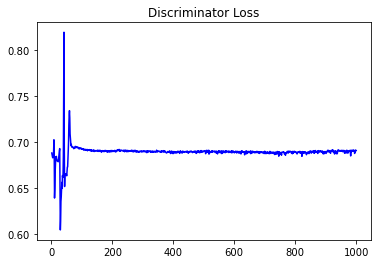

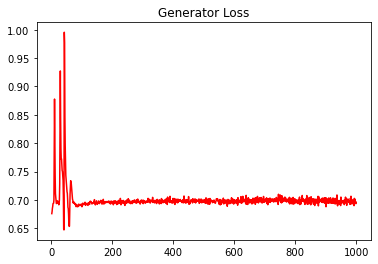

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.22651270933038997


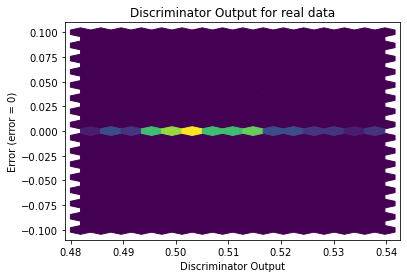

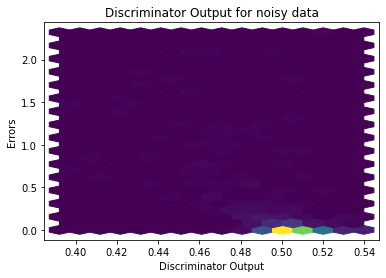

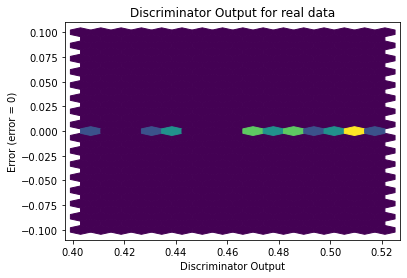

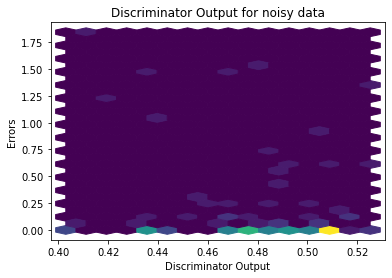

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


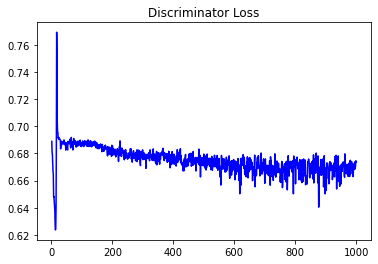

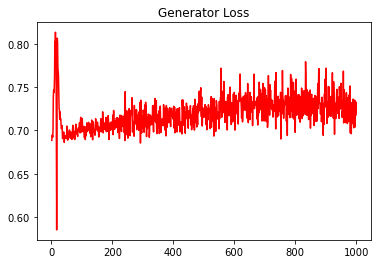

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.28515666260841427


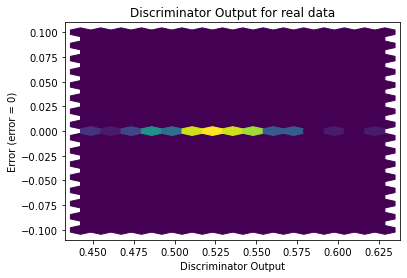

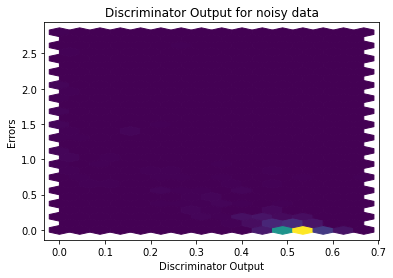

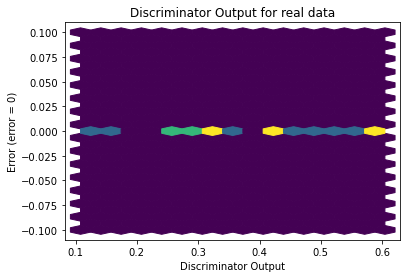

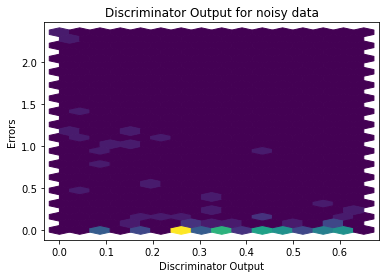

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1496]], requires_grad=True)
